In [2]:
# ссылка на репозиторий: https://github.com/AnastasiaKoshkina/ML
# доступ публичный, так как непонятно, каким пользователям гитхаба и/или на какие почты давать доступ

#подгружаем pandas
import pandas as pd 
#подгружаем numpy - понадобится для приведения дат к месяцам
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report

In [3]:
#загружаем файл с информацией об авокадо
avocado = pd.read_csv("avocado.csv", sep = ",")
avocado = avocado.drop(np.where(avocado['region'] == "TotalUS")[0]) #избавляемся от данных, где указаны данные за все штаты

avocado = avocado.drop(columns=["Small Bags","Large Bags","XLarge Bags","Total Bags","region","Date"]) #удаление лишних столбцов
avocado = avocado.drop(avocado.columns[[0]], axis=1) #удаляем 1 столбец, в нем были индексы

avocado.info()
avocado.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17911 entries, 0 to 18248
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  17911 non-null  float64
 1   Total Volume  17911 non-null  float64
 2   4046          17911 non-null  float64
 3   4225          17911 non-null  float64
 4   4770          17911 non-null  float64
 5   type          17911 non-null  object 
 6   year          17911 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 1.1+ MB


,AveragePrice,Total Volume,4046,4225,4770,year
count,17911.000000,1.791100e+04,1.791100e+04,1.791100e+04,17911.000000,17911.000000
mean,1.407619,5.392587e+05,1.838074e+05,1.882231e+05,14551.234381,2016.147898
std,0.404253,1.224332e+06,5.151059e+05,4.519856e+05,48817.536762,0.939939
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.057102e+04,8.196600e+02,2.909610e+03,0.000000,2015.000000
50%,1.370000,1.001541e+05,7.824430e+03,2.670199e+04,164.230000,2016.000000
75%,1.670000,4.001767e+05,1.014888e+05,1.317552e+05,5736.735000,2017.000000
max,3.250000,1.127475e+07,5.160897e+06,5.402444e+06,804558.250000,2018.000000


In [4]:
#очищаем от 0

avocado = avocado[avocado['4770'] > 0]
avocado = avocado[avocado['4225'] > 0]
avocado = avocado[avocado['4046'] > 0]

avocado.describe()

,AveragePrice,Total Volume,4046,4225,4770,year
count,12414.000000,1.241400e+04,1.241400e+04,1.241400e+04,12414.000000,12414.000000
mean,1.313656,7.700501e+05,2.637456e+05,2.690130e+05,20994.615676,2016.147173
std,0.385945,1.410240e+06,6.016491e+05,5.228944e+05,57473.688485,0.930957
min,0.460000,8.671800e+02,1.200000e+00,7.020000e+00,0.830000,2015.000000
25%,1.030000,7.514788e+04,3.683835e+03,1.887040e+04,128.277500,2015.000000
50%,1.240000,2.377976e+05,4.676454e+04,6.666042e+04,1458.815000,2016.000000
75%,1.550000,6.612757e+05,1.697218e+05,2.454524e+05,13357.935000,2017.000000
max,3.040000,1.127475e+07,5.160897e+06,5.402444e+06,804558.250000,2018.000000


In [5]:
#переменная string определились как object - исправляем. делаем ее bool, т.к. в ней записывается только 2 значения

#avocado['type'] = avocado['type'].astype('str') 
avocado = avocado.replace({'type': {'conventional': True,'organic': False}})
avocado = avocado.dropna()

avocado.info()
avocado.head()

# Тестовая обучающая и все все все
from sklearn.model_selection import train_test_split
trg = avocado['type']  # Отделяем от выборки значение зависимой переменной
trn = avocado.drop(columns=['type'], axis=1)
Xtrn, Xtest, Ytrn, Ytest = train_test_split(trn, trg, test_size = 0.2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12414 entries, 0 to 18248
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  12414 non-null  float64
 1   Total Volume  12414 non-null  float64
 2   4046          12414 non-null  float64
 3   4225          12414 non-null  float64
 4   4770          12414 non-null  float64
 5   type          12414 non-null  bool   
 6   year          12414 non-null  int64  
dtypes: bool(1), float64(5), int64(1)
memory usage: 691.0 KB


              precision    recall  f1-score   support

       False       0.95      0.96      0.95       691
        True       0.98      0.98      0.98      1792

    accuracy                           0.97      2483
   macro avg       0.97      0.97      0.97      2483
weighted avg       0.97      0.97      0.97      2483

              precision    recall  f1-score   support

       False       0.98      0.96      0.97       691
        True       0.98      0.99      0.99      1792

    accuracy                           0.98      2483
   macro avg       0.98      0.97      0.98      2483
weighted avg       0.98      0.98      0.98      2483

              precision    recall  f1-score   support

       False       0.97      0.94      0.95       691
        True       0.98      0.99      0.98      1792

    accuracy                           0.97      2483
   macro avg       0.97      0.96      0.97      2483
weighted avg       0.97      0.97      0.97      2483



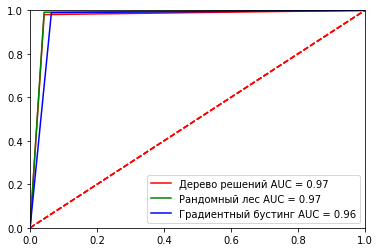

In [6]:
# Дерево решений
from sklearn.tree import DecisionTreeClassifier

christmas_tree = DecisionTreeClassifier(criterion = 'entropy')
christmas_tree.fit(Xtrn,Ytrn)
christmas_predict = christmas_tree.predict(Xtest)
print(classification_report(Ytest, christmas_predict))

# Считаем все для РОК кривой и рисуем, но пока что не показываем
fpr, tpr, threshold = metrics.roc_curve(Ytest, christmas_predict)
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, 'r', label = 'Дерево решений AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])

# Рандомный лес
from sklearn.ensemble import RandomForestClassifier

dark_forest = RandomForestClassifier(n_estimators=100)
dark_forest.fit(Xtrn,Ytrn)
dark_forest_predict = dark_forest.predict(Xtest)
print(classification_report(Ytest, dark_forest_predict))

fpr, tpr, threshold = metrics.roc_curve(Ytest, dark_forest_predict)
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, 'g', label = 'Рандомный лес AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])

# Градиентный бустинг
from sklearn.ensemble import GradientBoostingClassifier

bass_boosted = GradientBoostingClassifier()
bass_boosted.fit(Xtrn,Ytrn)
bass_boosted_predict = bass_boosted.predict(Xtest)
print(classification_report(Ytest, bass_boosted_predict))

fpr, tpr, threshold = metrics.roc_curve(Ytest, bass_boosted_predict)
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, 'b', label = 'Градиентный бустинг AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])

plt.show()